# Kaggle Project

## Dataset Review

**URL:** https://www.kaggle.com/datasets/adityakadiwal/water-potability/data

**Task:**

Ensuring the quality of drinking water is paramount to the general wellness of the public. However, despite multiple advancements in recent years, access to safe quality drinking water remains a critical issue.

In this Kaggle Dataset Analysis Project, a variety of machine learning models such as Logistic Regression (LR), Decision Tree (DT), Support Vector Machine (SVM), Random Forest Classifier (RFC), and Neural Network (NN) through Multilayer Perceptron (MLP) Classifier are built and trained to examine the "Water Quality" Kaggle dataset. 

Besides exploring the "Water Quality" dataset, another aim of this dataset analysis is to evaluate which model provides the best prediction on water potability.

**Datasets**

* Train dataset: 2457 random datapoints (75% of the total 3276 water body datapoints)

* Validation dataset: 819 random datapoints (25% of the total 3276 water body datapoints)

* Test dataset: 819 random datapoints (25% of the total 3276 water body datapoints)

The water_potability.csv file provided from the "Water Quality" kaggle dataset contains 10 different water quality parameters (variables) for 3276 different water bodies.

ppm: parts per million ; μg/L: microgram per liter ; μS/cm: microsiemens per centimeter ; mg/L: milligram per liter

**Features(x):**

1) pH: pH is a quantitive measure of the acidity and basicity of any aqueous or any liquid solutions. pH values that are less than 7 are acidic, and pH values greater than 7 are considered basic/alkaline. According to the World Health Organization (WHO), the maximum permissible limit of pH for drinking water is between 6.5-8.5.
2) Hardness: Water hardness is the amount of dissolved calcium (Ca) and magnesium (Mg) in water. Hard water is high in dissolved minerals, largely of Ca and Mg. Guidelines for classification of Ca carbonate in water are: soft - 0 to 60 mg/L; moderately hard - 61 to 120 mg/L; hard - 121 to 180 mg/L; and very hard - >180 mg/L.
3) Solids (Total Dissolved Solids - TDS): TDS are the amount of organic and inorganic materials such as metals, minerals, sals, and ions, dissolved in a particular volume of water. It is commonly measured in mg/L or ppm. High TDS means the water has high minerals. Desirable limit of TDS for drinking water is 50-300 ppm or mg/L.
4) Chloramines: Chloramines are disinfectants used to treat drinking water. They are commonly formed when ammonia is added to chlorine to treat drinking water. The level of chlorine that is considered safe in drinking water is 4 ppm or mg/L.
5) Sulfate: Sulfate are naturally found in minerals, soil, and rocks. They contribute to the acidification of surface water and soil, and contributes to acid rain and fog. The maximum sulfate level for safe drinking water is 250 mg/L.
6) Conductivity: Electrical conductivity (EC) refers to the ability of water to conduct an electrical current in water over a certain distance. The ability of water to conduct electricity comes from the concentration of ions within the water. From the standards given by WHO, the maximum EC value for drinking water is 400 μS/cm.
7) Organic Carbon: The total organic carbon (TOC) is the amount of carbon atoms tied up in organic compounds in a water sample. It does not identify specific carbon-containing compounds, only the presence of unwanted organic compounds in pure water. A high organic content means an increase in the growth of microorganisms which contribute to the depletion of oxygen supplies. The acceptable TOC in drinking water is <2.0 mg/L.
8) Trihalomethanes: Trihalomethanes (THMs) are the results of a reaction between the chlorine used for disinfecting tap water and natural organic matter in the water. THM levels that are up to 80 ppm are considered safe in drinking water.
9) Turbidity: Turbidity refers to the haziness of water. High turbid conditions are caused by suspended solids or tiny particles. When the concentration of total suspended solids (TSS) and TDS in the water increase, the turbidity also increases. Turbid water doesn’t just cause drinking water to go cloudy, it is also an important indicator of suspended sediments in water, the presence of pathogens, bacteria, and other contaminants. The required turbidity limit for safe drinking water is 1-5 Nephelometric Turbidity Units (NTU).

**Target(y):**

10) Potability: Potability indicates if the water is suitable or safe for human consumption such as drinking or cooking, where 1 means potable drinking water, and 0 means not potable. 

---

## Model Building

### Data Reading and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("C:\\Users\\Portus\\Downloads\\Water Potability Kaggle Dataset\\water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


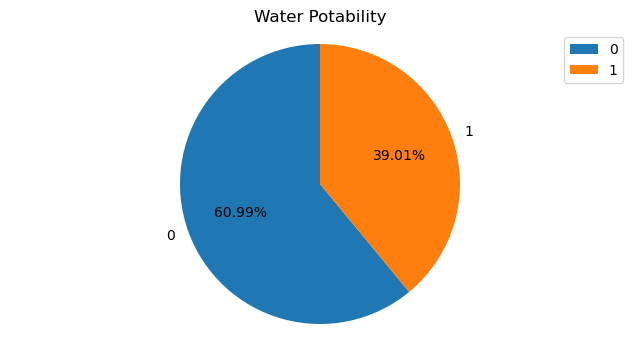

In [3]:
def pie_chart(data, column_name):
    
    values = data[column_name].value_counts()
    labels = data[column_name].unique()
    
    plt.figure(figsize = (8,4))
    plt.pie(values, labels = labels, autopct = '%1.2f%%', startangle=90)
    plt.legend(labels, loc='best')
    plt.axis('equal')
    plt.title('Water Potability')
    plt.show()
    
pie_chart(data, 'Potability')

In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
data.duplicated().value_counts()

False    3276
dtype: int64

In [7]:
fill_columns = ['ph', 'Sulfate', 'Trihalomethanes']
data[fill_columns] = data.groupby('Potability')[fill_columns].transform(lambda x: x.fillna(x.mean()))

In [8]:
# Input data_x
x = data.drop(["Potability"], axis = 1)
# Output data_y
y = data.Potability.values

x.shape, y.shape

((3276, 9), (3276,))

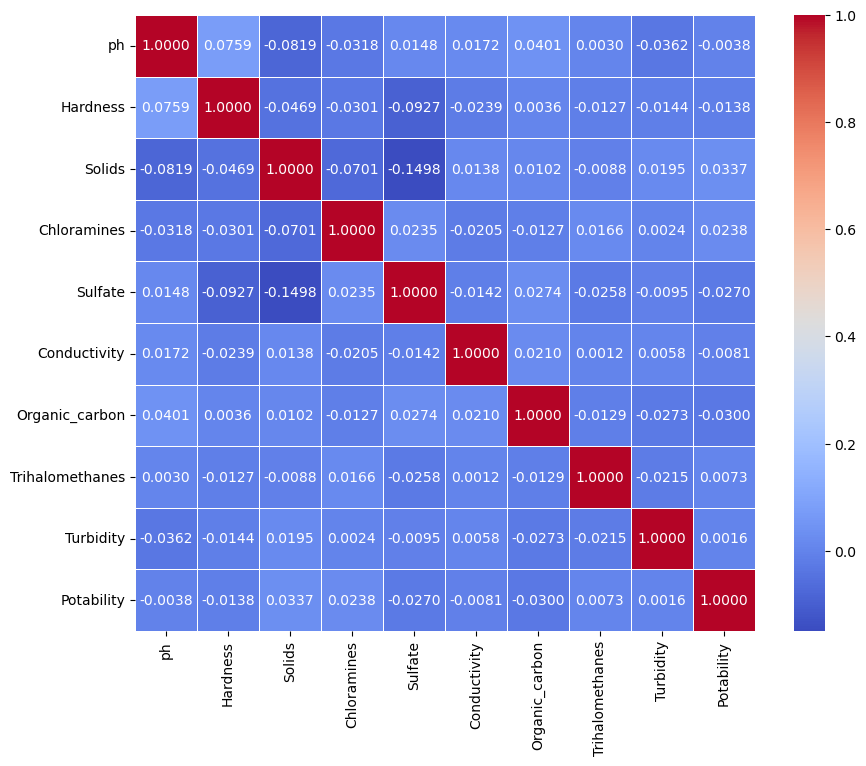

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".4f")
plt.show()

### Model Construction

In [10]:
train_len = 2457
train_idxs = np.random.choice(len(data), train_len, replace=False)
train_x = x.iloc[train_idxs]
train_y = y[train_idxs]

In [11]:
val_idxs = [idx for idx in range(len(data)) if idx not in train_idxs]
val_x = x.iloc[val_idxs]
val_y = y[val_idxs]

In [12]:
test_len = 819
test_idxs = np.random.choice(len(data), test_len, replace=False)
test_x = x.iloc[test_idxs]
test_y = y[test_idxs]

In [13]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [14]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(criterion='absolute_error', splitter='best', max_depth=2)

from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth=6, min_samples_split=3,  random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=50, max_features=8, min_samples_split=2)

In [16]:
from sklearn.svm import SVC
model_svc = SVC(C=1.0, kernel='sigmoid', random_state=50)

In [17]:
from sklearn.neural_network import MLPClassifier
model_mlpc = MLPClassifier(solver='adam', hidden_layer_sizes=1000, activation='relu', random_state=100)

In [18]:
models = [model_lr, model_dtr, model_dtc, model_rfc, model_svc, model_mlpc]

### Train Model & Select Model

In [19]:
def mse_loss(pre, y):
    return ((pre-y)**2).mean()

def accuracy(pre, y):

    return sum(pre==y)/len(y)

In [20]:
model_names = ['Logistic Regression', 'Decision Tree Regressor', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Machine', 'Neural Network']
loss_values = []
accuracies = []

In [21]:
for model in models:
    model.fit(train_x, train_y)
    pre = model.predict(train_x)
    
    loss_value = mse_loss(pre, train_y)
    acc = accuracy(pre, train_y)
    
    print(f"{model} loss value \t: {loss_value}")
    print(f"{model} accuracy   \t: {acc}")

LogisticRegression(max_iter=1000) loss value 	: 0.38787138787138786
LogisticRegression(max_iter=1000) accuracy   	: 0.6121286121286121
DecisionTreeRegressor(criterion='absolute_error', max_depth=2) loss value 	: 0.29507529507529506
DecisionTreeRegressor(criterion='absolute_error', max_depth=2) accuracy   	: 0.7049247049247049
DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=42) loss value 	: 0.1908831908831909
DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=42) accuracy   	: 0.8091168091168092
RandomForestClassifier(max_depth=10, max_features=8, n_estimators=1000,
                       random_state=50) loss value 	: 0.04802604802604803
RandomForestClassifier(max_depth=10, max_features=8, n_estimators=1000,
                       random_state=50) accuracy   	: 0.951973951973952
SVC(kernel='sigmoid', random_state=50) loss value 	: 0.48717948717948717
SVC(kernel='sigmoid', random_state=50) accuracy   	: 0.5128205128205128
MLPClassifier(hidden_la

In [22]:
for model in models:
    pre = model.predict(val_x)
    
    loss_value = mse_loss(pre, val_y)
    acc = accuracy(pre, val_y)
    
    loss_values.append(loss_value)
    accuracies.append(acc)
    
    print(f"{model} loss value \t: {loss_value}")
    print(f"{model} accuracy   \t: {acc}")

LogisticRegression(max_iter=1000) loss value 	: 0.39438339438339437
LogisticRegression(max_iter=1000) accuracy   	: 0.6056166056166056
DecisionTreeRegressor(criterion='absolute_error', max_depth=2) loss value 	: 0.29304029304029305
DecisionTreeRegressor(criterion='absolute_error', max_depth=2) accuracy   	: 0.706959706959707
DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=42) loss value 	: 0.23076923076923078
DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=42) accuracy   	: 0.7692307692307693
RandomForestClassifier(max_depth=10, max_features=8, n_estimators=1000,
                       random_state=50) loss value 	: 0.1978021978021978
RandomForestClassifier(max_depth=10, max_features=8, n_estimators=1000,
                       random_state=50) accuracy   	: 0.8021978021978022
SVC(kernel='sigmoid', random_state=50) loss value 	: 0.45054945054945056
SVC(kernel='sigmoid', random_state=50) accuracy   	: 0.5494505494505495
MLPClassifier(hidden_la

---

## Performance

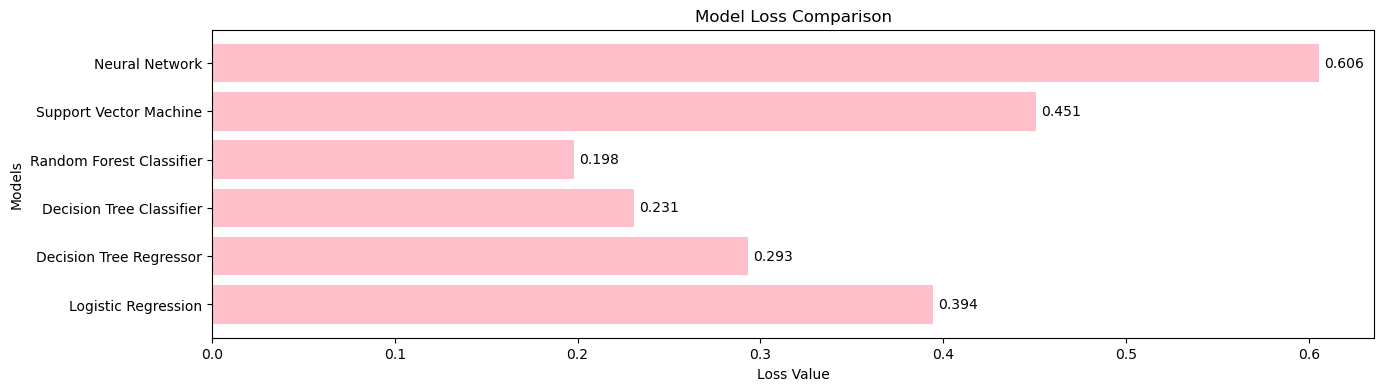

In [23]:
plt.figure(figsize = (15,4))
plt.barh(np.arange(len(models)), loss_values, color='pink')
plt.yticks(np.arange(len(model_names)), model_names)
plt.ylabel('Models')
plt.xlabel('Loss Value')
plt.title('Model Loss Comparison')

for i, acc in enumerate(loss_values):
    plt.text(acc+0.003, i, f'{acc:.3f}', va='center', fontsize=10)
plt.show()

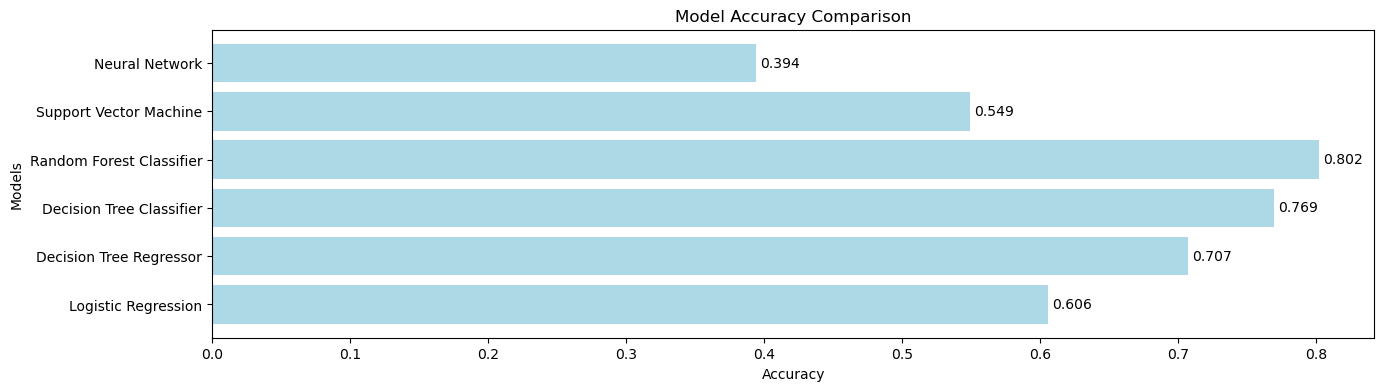

In [24]:
plt.figure(figsize = (15,4))
plt.barh(np.arange(len(models)), accuracies, color='lightblue')
plt.yticks(np.arange(len(model_names)), model_names)
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')

for i, acc in enumerate(accuracies):
    plt.text(acc+0.003, i, f'{acc:.3f}', va='center', fontsize=10)
plt.show()

In [25]:
best_model = model_rfc

In [26]:
x = test_x
y = test_y
    
pre = best_model.predict(x)

data = {'Actual Potability': y, 'Predicted Potability': pre}
result_table = pd.DataFrame(data)
pd.set_option('display.max_rows', None)
print(result_table)

     Actual Potability  Predicted Potability
0                    0                     0
1                    1                     1
2                    1                     1
3                    0                     0
4                    0                     0
5                    0                     0
6                    0                     0
7                    1                     0
8                    0                     1
9                    0                     0
10                   0                     0
11                   0                     0
12                   0                     1
13                   1                     1
14                   0                     0
15                   0                     0
16                   1                     1
17                   0                     0
18                   1                     1
19                   0                     0
20                   0                     0
21        

The results explain

that among the machine learning models used to model the water quality dataset, the Random Forest Classifier (RFC) performs the best by minimizing the loss value (~0.2) and giving an accuracy of 80%. Despite not tuning the Random Forest Classifier model to its optimal hyperparameters, the model was able to perform well statistically. Comparing the actual potability values to RFC's predicted potability values, the RFC also showed promising results. 